# Mummering workshop on the analysis of large 3D/4D datasets
# Big Data Quantification Lecture
# September 9, 2020

## Quantitative Analysis, Reproduciblility and Big Data

In [1]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.resources import CDN
output_notebook(CDN, hide_banner=True)
local_cluster = False
if local_cluster:
    from dask.distributed import Client, LocalCluster
    cluster = LocalCluster(n_workers=2, threads_per_worker=2)
    client = Client(cluster)
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.size"] = 14
plt.rcParams["figure.constrained_layout.use"] = True
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})

# Literature / Useful References

### Imaging

 - [ImageJ and SciJava](http://www.slideshare.net/CurtisRueden/imagej-and-the-scijava-software-stack)
 - [Concurrency](www.gotw.ca/publications/concurrency-ddj.htm)
- Reproducibility
 - [Trouble at the lab](http://www.economist.com/news/briefing/21588057-scientists-think-science-self-correcting-alarming-degree-it-not-trouble) _Scientists like to think of science as self-correcting. To an alarming degree, it is not_
 - [Why is reproducible research important?](http://simplystatistics.org/2014/06/06/the-real-reason-reproducible-research-is-important/) _The Real Reason Reproducible Research is Important_
 - [Science Code Manifesto](http://software-carpentry.org/blog/2011/10/the-science-code-manifestos-five-cs.html)
 - [Reproducible Research Class](https://www.coursera.org/course/repdata) @ Johns Hopkins University
 
### Big Data

- [Google's Presentation on Distributed Computing](http://www.youtube.com/watch?v=yjPBkvYh-ss&feature=youtu.be)
 - [Slides](http://www.slideshare.net/tugrulh/google-cluster-computing-and-mapreduce-introduction-to-distributed-system-design)
 - [MapReduce Paper](http://citeseerx.ist.psu.edu/viewdoc/summary;jsessionid=110C01079B22F1138DBDB74A20F65AF4?doi=10.1.1.135.4448): Jeffrey Dean, et al. (n.d.). MapReduce: Simplified Data Processing on Large Clusters.
- [Scalable Systems Course](https://courses.cs.washington.edu/courses/cse490h/08au/)
- [Tutorial in Hadoop](http://www.youtube.com/watch?v=KwW7bQRykHI)
- [Intro to Data Science @UCB](http://amplab.github.io/datascience-sp14/)

### Cluster Computing

- Altintas, I. (2013). Workflow-driven programming paradigms for distributed analysis of biological big data. In 2013 IEEE 3rd International Conference on Computational Advances in Bio and medical Sciences (ICCABS) (pp. 1â1). IEEE. doi:10.1109/ICCABS.2013.6629243
- [Condor High-throughput Computing](http://www.cs.wisc.edu/condor/)
- [Condor Setup at ITET](https://computing.ee.ethz.ch/Services/Condor)
- [Sun (now Oracle) Grid Engine](http://gridscheduler.sourceforge.net/htmlman/manuals.html) or [here](http://wiki.gridengine.info/wiki/index.php/Main_Page)

### Databases

- Ollion, J., Cochennec, J., Loll, F., EscudÃ©, C., & Boudier, T. (2013). [TANGO](http://www.pubmedcentral.nih.gov/articlerender.fcgi?artid=3702251&tool=pmcentrez&rendertype=abstract): a generic tool for high-throughput 3D image analysis for studying nuclear organization. Bioinformatics (Oxford, England), 29(14), 1840â1. doi:10.1093/bioinformatics/btt276

### Cloud Computing

- Amazon S3
- [The Case for Energy-Proportional Computing](http://www-inst.eecs.berkeley.edu/~cs61c/sp14/) _ Luiz André Barroso, Urs Hölzle, IEEE Computer, December 2007_
- Sitaram, D., & Manjunath, G. (2012). Moving To The Cloud. null (Vol. null). Elsevier. doi:10.1016/B978-1-59749-725-1.00006-8
- Duan, P., Wang, W., Zhang, W., Gong, F., Zhang, P., & Rao, Y. (2013). Food Image Recognition Using Pervasive Cloud Computing. In 2013 IEEE International Conference on Green Computing and Communications and IEEE Internet of Things and IEEE Cyber, Physical and Social Computing (pp. 1631â1637). IEEE. doi:10.1109/GreenCom-iThings-CPSCom.2013.296

# Outline

- Motivation
- Computer Science Principles
 - Parallelism
 - Distributed Computing
 - Imperative Programming
 - Declarative Programming
- Organization
 - Queue Systems / Cluster Computing
 - Parameterization
 - Databases
 

- Big Data
 - MapReduce
 - Spark
 - Streaming
- Cloud Computing
- Beyond / The future

# Motivation

![Crazy Workflow](../common/figures/crazyworkflow.png)
- To understand what, why and how from the moment an image is produced until it is finished (published, used in a report, …)
- To learn how to go from one analysis on one image to 10, 100, or 1000 images (without working 10, 100, or 1000X harder)

## Motivation


1. __Experimental Design__ finding the right technique, picking the right dyes and samples has stayed relatively consistent, better techniques lead to more demanding scientits.

2. __Management__ storing, backing up, setting up databases, these processes have become easier and more automated as data magnitudes have increased

3. __Measurements__ the actual acquisition speed of the data has increased wildly due to better detectors, parallel measurement, and new higher intensity sources

4. __Post Processing__ this portion has is the most time-consuming and difficult and has seen minimal improvements over the last years

![Experiment Breakdown](../common/figures/experiment-breakdown.png)

# Motivation


There are three different types of problems that we will run into.

### Really big data sets
- Several copies of the dataset need to be in memory for processing
- Computers with more 256GB are expensive and difficult to find
- Even they have 16 cores so still 16GB per CPU
- Drive speed / network file access becomes a limiting factor
- If it crashes you __lose__ everything
 - or you have to manually write a bunch of mess check-pointing code


### Many datasets
- For genome-scale studies 1000s of samples need to be analyzed identically
- Dynamic experiments can have hundreds of measurements 
- Animal phenotyping can have many huge data-sets (1000s of 328GB datasets)
- Radiologist in Switzerland alone make 1 Petabyte of scans per year

### Exploratory Studies
- Not sure what we are looking for
- Easy to develop new analyses
- Quick to test hypotheses

- Detectors are getting bigger and faster constantly
- Todays detectors are really fast
 - 2560 x 2160 images @ 1500+ times a second = 8GB/s
- Matlab / Avizo / Python / … are saturated after 60 seconds
- A single camera
 - [More information per day than Facebook](http://news.cnet.com/8301-1023_3-57498531-93/facebook-processes-more-than-500-tb-of-data-daily/)
 - [Three times as many images per second as Instagram](http://techcrunch.com/2013/01/17/instagram-reports-90m-monthly-active-users-40m-photos-per-day-and-8500-likes-per-second/)

### X-Ray
 - SRXTM images at (>1000fps) → 8GB/s
 - cSAXS diffraction patterns at 30GB/s
 - Nanoscopium Beamline, 10TB/day, 10-500GB file sizes

### Optical
 - Light-sheet microscopy (see talk of Jeremy Freeman) produces images → 500MB/s
 - High-speed confocal images at (>200fps) → 78Mb/s

### Personal
 - GoPro 6 Black - 100MB/s (compressed) (3840 x 2160 x 60fps) for \$600
 - [fps1000](https://www.kickstarter.com/projects/1623255426/fps1000-the-low-cost-high-frame-rate-camera) - 400MB/s (640 x 480 x 840 fps) for $400
 

In [2]:
from IPython.display import display, Markdown


def display_md(x): return display(Markdown(x))


display_md('## GoPro Breakdown')
display_md(
    '- Raw Video: $ 3860*2160*3*60 \\rightarrow %2.2f \\frac{\\text{GB}}{\\text{s}}$' % (3860*2160*3*60/1e9))
display_md(
    '- $\\rightarrow %2.2f \\frac{\\text{TB}}{\\text{h}}$' % (3860*2160*3*60/1e12*3600))
display_md(
    '- $\\rightarrow %2.2f \\frac{\\text{PB}}{\\text{year}}$' % (3860*2160*3*60/1e15*3600*24*365))
display_md('- Facebook Data Warehouse in 2014 = [300PB](https://code.facebook.com/posts/229861827208629/scaling-the-facebook-data-warehouse-to-300-pb/), %2.2f years' % (
    200/(3860*2160*3*60/1e15*3600*24*365)))

## GoPro Breakdown

- Raw Video: $ 3860*2160*3*60 \rightarrow 1.50 \frac{\text{GB}}{\text{s}}$

- $\rightarrow 5.40 \frac{\text{TB}}{\text{h}}$

- $\rightarrow 47.33 \frac{\text{PB}}{\text{year}}$

- Facebook Data Warehouse in 2014 = [300PB](https://code.facebook.com/posts/229861827208629/scaling-the-facebook-data-warehouse-to-300-pb/), 4.23 years

# How much is a terabyte really?
 - (1000GB or 0.001PB)

- If you looked at one (872, 1000, 3) sized-image every second

- It would take **106.2** hours to view a terabyte

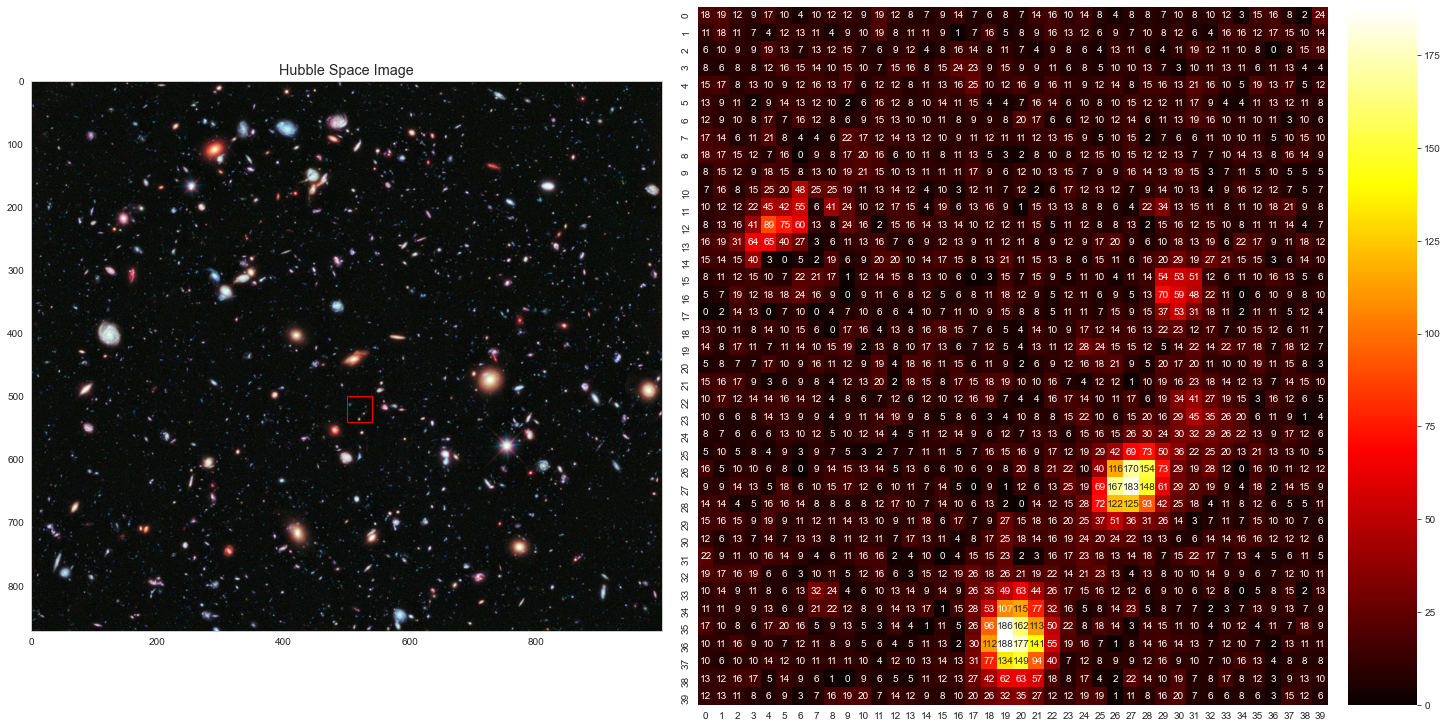

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.data import hubble_deep_field
import seaborn as sns
import matplotlib.patches as patches

display_md('# How much is a terabyte really?\n - (1000GB or 0.001PB)')
test_img = hubble_deep_field()
display_md(
    '- If you looked at one {} sized-image every second'.format(test_img.shape))
fig, (ax1, ax2) = plt.subplots(1, 2,
                               figsize=(20, 10))
ax1.imshow(test_img)
rect = patches.Rectangle((500, 500), 40, 40, linewidth=1,
                         edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax1.add_patch(rect)
ax1.set_title('Hubble Space Image')

sns.heatmap(test_img[500:540, 500:540, 0],
            annot=True,
            fmt='d',
            cmap=plt.cm.hot)

# assuming 8-bit images and a 'metric' terabyte
time_per_tb = 1e12/(test_img.nbytes) / (60*60)
display_md("- It would take **%04.1f** hours to view a terabyte" %
           (time_per_tb))

# Example Projects


### Zebra fish Full Animal Phenotyping 

__Full adult animal at cellular resolution__
1000s of samples of full adult animals, imaged at 0.74 $\mu m$ resolution: Images
11500 x 2800 x 628 $\longrightarrow$ 20-40GVx / sample

<video controls>
  <source src="ext-figures/fish-scanthrough.mov" type="video/mp4">
Your browser does not support the video tag.
</video>

- Identification of single cells (no down-sampling)
- Cell networks and connectivity
- Classification of cell type
- Registration with histology



### Brain Project
__Whole brain with cellular resolution__
1 $cm^3$  scanned at 1 $\mu m$ resolution: Images $\longrightarrow$ 1000 GVx / sample

- Registration separate scans together
- Blood vessel structure and networks
- Registration with fMRI, histology

## Overwhelmed

- Count how many cells are in the bone slice
- Ignore the ones that are ‘too big’ or shaped ‘strangely’
- Are there more on the right side or left side?
- Are the ones on the right or left bigger, top or bottom?


![cells in bone tissue](../common/figures/bone-cells.png)

## More overwhelmed

- Do it all over again for 96 more samples, this time with 2000 slices instead of just one!


![more samples](../common/figures/96-samples.png)

## It gets better


- Those metrics were quantitative and could be easily visually extracted from the images
- What happens if you have _softer_ metrics


![alignment](../common/figures/alignment-figure.png)


- How aligned are these cells?
- Is the group on the left more or less aligned than the right?
- errr?

# Computing has changed: Parallel


## Moores Law
$$ \textrm{Transistors} \propto 2^{T/(\textrm{18 months})} $$

<small>_Based on data from https://gist.github.com/humberto-ortiz/de4b3a621602b78bf90d_</small>

----

There are now many more transistors inside a single computer but the processing speed hasn't increased. How can this be?

- Multiple Core
 - Many machines have multiple cores for each processor which can perform tasks independently
- Multiple CPUs
 - More than one chip is commonly present
- New modalities
  - GPUs provide many cores which operate at slow speed

### Parallel Code is important

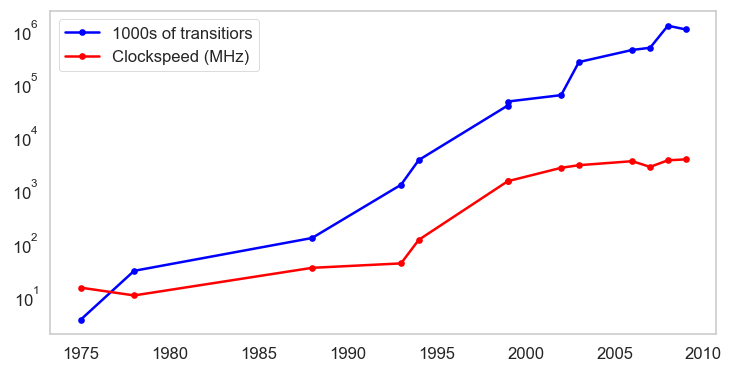

In [4]:
%matplotlib inline
# stolen from https://gist.github.com/humberto-ortiz/de4b3a621602b78bf90d
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
moores_txt = ["Id Name  Year  Count(1000s)  Clock(MHz)\n",
              "0            MOS65XX  1975           3.51           14\n",
              "1          Intel8086  1978          29.00           10\n",
              "2          MIPSR3000  1988         120.00           33\n",
              "3           AMDAm486  1993        1200.00           40\n",
              "4        NexGenNx586  1994        3500.00          111\n",
              "5          AMDAthlon  1999       37000.00         1400\n",
              "6   IntelPentiumIII  1999       44000.00         1400\n",
              "7         PowerPC970  2002       58000.00         2500\n",
              "8       AMDAthlon64  2003      243000.00         2800\n",
              "9    IntelCore2Duo  2006      410000.00         3330\n",
              "10         AMDPhenom  2007      450000.00         2600\n",
              "11      IntelCorei7  2008     1170000.00         3460\n",
              "12      IntelCorei5  2009      995000.00         3600"]

sio_table = StringIO(''.join(moores_txt))
moore_df = pd.read_table(sio_table, sep='\s+', index_col=0)
fig, ax1 = plt.subplots(1, 1, figsize=(6, 3), dpi = 120)
ax1.semilogy(moore_df['Year'], moore_df['Count(1000s)'],
             'b.-', label='1000s of transitiors')
ax1.semilogy(moore_df['Year'], moore_df['Clock(MHz)'],
             'r.-', label='Clockspeed (MHz)')
ax1.legend(loc=2);

# What is wrong with usual approaches?

Normally when problems are approached they are solved for a single task as quickly as possible
- I need to filter my image with a median filter with a neighborhood of 5 x 5 and a square kernel
- then make a threshold of 10
- label the components
- then count how many voxels are in each component
- save it to a file

```
im_in=imread('test.jpg');
im_filter=medfilt2(im_in,[5,5]);
cl_img=bwlabel(im_filter>10);
cl_count=hist(cl_img,1:100);
dlmwrite(cl_count,'out.txt')
```



- What if you want to compare Gaussian and Median?
- What if you want to look at 3D instead of 2D images?
- What if you want to run the same analysis for a folder of images?


**You have to rewrite everything, everytime**

**If you start with a bad approach, it is very difficult to fix, big data and reproducibility must be considered from the beginning**

# Computer Science Principles


### Disclosure : There are entire courses / PhD thesis's / Companies about this, so this is just a quick introduction

- Parallelism
- Distributed Computing
- Resource Contention
 - Shared-Memory
 - Race Conditions
 - Synchronization
 - Dead lock
- Imperative
- Declarative 
 

# What is parallelism?


Parallelism is when you can divide a task into separate pieces which can then be worked on at the same time. 

### For example 
- if you have to walk 5 minutes and talk on the phone for 5 minutes
- you can perform the tasks serially which then takes 10 minutes
- you can perform the tasks in parallel which then takes 5 minutes

Some tasks are easy to parallelize while others are very difficult. Rather than focusing on programming, real-life examples are good indicators of difficultly.

# What is distributed computing?

Distributed computing is very similar to parallel computing, but a bit more particular. Parallel means you process many tasks at the same time, while distributed means you are no longer on the same CPU, process, or even on the same machine.

The distributed has some important implications since once you are no longer on the same machine the number of variables like network delay, file system issues, and other users becomes a major problem.

# Distributed Computing Examples


1. You have 10 friends who collectively know all the capital cities of the world.
 - To find the capital of a single country you just yell the country and wait for someone to respond (+++)
 - To find who knows the most countries, each, in turn, yells out how many countries they know and you select the highest (++)
 


1. Each friend has some money with them
 - To find the total amount of money you tell each person to tell you how much money they have and you add it together (+)
 - To find the __median__ coin value, you ask each friend to tell you you all the coins they have and you make one master list and then find the median coin (-)

# Resource Contention

The largest issue with parallel / distributed tasks is the need to access the same resources at the same time

- memory / files
- pieces of information
- network resources


### Dead-lock
[Dining Philopher's Problem](http://en.wikipedia.org/wiki/Dining_philosophers_problem)
- 6 philosophers at the table
- 6 forks
- Everyone needs two forks to eat
- Each philospher takes the fork on his left

# Parallel Challenges


### Coordination
Parallel computing requires a significant of coordinating between computers for non-easily parallelizable tasks.

### Mutability
The second major issue is mutability, if you have two cores / computers trying to write the same information at the same it is no longer deterministic (not good)

### Blocking
The simple act of taking turns and waiting for every independent process to take its turn can completely negate the benefits of parallel computing

# Distributed Challenges


Inherits all of the problems of parallel programming with a whole variety of new issues.

### Sending Instructions / Data Afar

### Fault Tolerance
If you have 1000 computers working on solving a problem and one fails, you do not want your whole job to crash

### Data Storage

How can you access and process data from many different computers quickly without very expensive infrastructure

# Imperative Programming


Directly coordinating tasks on a computer. 

- Languages like C, C++, Java, Matlab
- Exact orders are given (implicit time ordering)
- Data management is manually controlled
- Job and task scheduling is manual
- Potential to tweak and optimize performance



### Making a soup

1. Buy vegetables at market
1. _then_ Buy meat at butcher
1. _then_ Chop carrots into pieces
1. _then_ Chop potatos into pieces
1. _then_ Heat water
1. _then_ Wait until boiling then add chopped vegetables
1. _then_ Wait 5 minutes and add meat

# Declarative 


- Languages like SQL, Erlang, Haskell, Scala, Python, R can be declarative
- Goals are stated rather than specific details
- Data is automatically managed and copied
- Scheduling is automatic but not always _efficient_



### Making a soup
- Buy vegetables at market $\rightarrow shop_{veggies}$ 
- Buy meat at butcher $\rightarrow shop_{meat}$ 
- Wait for $shop_{veggies}$: Chop carrots into pieces $\rightarrow chopped_{carrots}$
- Wait for $shop_{veggies}$: Chop potatos into pieces $\rightarrow chopped_{potatos}$
- Heat water $\rightarrow boiling_{water}$ 
- Wait for $boiling_{water}$,$chopped_{carrots}$,$chopped_{potatos}$: Add chopped vegetables $\rightarrow broth$ 
 - Wait for $broth$, $shop_{meat}$:  5 minutes and add meat
 

# Comparison

They look fairly similar, so what is the difference? The second is needlessly complicated for one person, but what if you have a team, how can several people make an imperitive soup faster (chopping vegetables together?)

### Imperative soup

1. Buy {carrots, peas, tomatoes} at market
1. _then_ Buy meat at butcher
1. _then_ Chop carrots into pieces
1. _then_ Chop potatos into pieces
1. _then_ Heat water
1. _then_ Wait until boiling then add chopped vegetables
1. _then_ Wait 5 minutes and add meat



How can many people make a declarative soup faster? Give everyone a different task (not completely efficient since some tasks have to wait on others)

### Declarative soup
- Buy vegetables at market $\rightarrow shop_{veggies}$ 
- Buy meat at butcher $\rightarrow shop_{meat}$ 
- Wait for $shop_{veggies}$: Chop carrots into pieces $\rightarrow chopped_{carrots}$
- Wait for $shop_{veggies}$: Chop potatos into pieces $\rightarrow chopped_{potatos}$
- Heat water $\rightarrow boiling_{water}$ 
- Wait for $boiling_{water}$,$chopped_{carrots}$,$chopped_{potatos}$: Add chopped vegetables $\rightarrow broth$ 
 - Wait for $broth$, $shop_{meat}$:  5 minutes and add meat
 

# Results


### Imperative
- optimize specific tasks (chopping vegetables, mixing) so that many people can do it faster
 - Matlab/Python do this with fast-fourier-transforms (automatically uses many cores to compute faster)
- make many soups at the same time (independent)
 - This leads us to cluster-based computing
 


### Declarative
- run everything at once
- each core (computer) takes a task and runs it
- execution order does not matter
 - wait for portions to be available (dependency)

### Lazy Evaluation
- do not run anything at all
- until something needs to be exported or saved
- run only the tasks that are needed for the final result
 - never buy tomatoes since they are not in the final soup


# Organization


One of the major challenges of scaling up experiments and analysis is keeping all of the results organized in a clear manner. As we have seen in the last lectures, many of the results produced many text files
- many files are difficult to organize
- Matlab, R are designed for in-memory computation
- Datasets can have many parameters and be complicated
- Transitioning from Excel to Matlab or R means rewriting everything

# Queue Computing


Queue processing systems (like Sun Grid Engine, Oracle Grid Engine, Apple XGrid, Condor, etc) are used to manage 
- resources (computers, memory, storage)
- jobs (tasks to be run)
- users
Based on a set of rules for how to share the resources to the users to run tasks. 



### Resources
- a collection of processors (CPU and GPU)
- memory, local storage 
- access to bandwidth or special resource like a printer
- for a given period of time

### Jobs
- specific task to run
- necessary (minimal/maximal) resources to run with
 - including execution time

### Users
- accounts submitting jobs
- it can be undesirable for one user to dominate all of the resources all the time

# Structure of Cluster


### Master (or Name) Node(s)
The node with which every other node communicates, the main address.

### Worker Nodes
The nodes where the computation is performed. 

### Scheduler
The actual process that decides which jobs will run using which resources (worker nodes, memory, bandwidth) at which time

# Databases


A database is a collection of data stored in the format of tables: a number of columns and rows.

In [5]:
from IPython.display import display, Markdown
import pandas as pd
display(Markdown('### Animals\nHere we have an table of the animals measured in an experiment and their weight'))
display(pd.DataFrame(dict(id=(1, 2, 3),
                          Weight=(100, 40, 80)
                          )))

display(Markdown(
    '### Cells\nThe cells is then an analysis looking at the cellular structures'))

display(pd.DataFrame(dict(
    Animal=(1, 1, 2),
    Type=("Cancer", "Healthy", "Cancer"),
    Anisotropy=(0.5, 1.0, 0.5),
    Volume=(1, 2, 0.95))))

### Animals
Here we have an table of the animals measured in an experiment and their weight

,id,Weight
0,1,100
1,2,40
2,3,80


### Cells
The cells is then an analysis looking at the cellular structures

,Animal,Type,Anisotropy,Volume
0,1,Cancer,0.5,1.00
1,1,Healthy,1.0,2.00
2,2,Cancer,0.5,0.95


# SQL


SQL (pronounced Sequel) stands for structured query language and is _nearly_ universal for both searching (called querying) and adding (called inserting) data into databases. SQL is used in various forms from Firefox storing its preferences locally (using SQLite) to Facebook storing some of its user information (MySQL and Hive). 
So refering to the two tables we defined in the last entry, we can use SQL to get information about the tables independently of how they are stored (a single machine, a supercomputer, or in the cloud)


### Basic queries

- Get the volume of all cells

```sql
SELECT Volume FROM Cells
```

$$ \rightarrow \begin{bmatrix} 1,2,0.95\end{bmatrix} $$

- Get the average volume of all cancer cells

```sql
SELECT AVG(Volume) FROM Cells WHERE Type = "Cancer"
```

$$ \rightarrow 0.975 $$

We could have done these easily without SQL using Excel, Matlab or R

![image.png](attachment:image.png)

# More Advanced SQL



- Get the volume of all cells in heavy mice
```sql
SELECT Volume FROM Cells WHERE Animal IN 
  (SELECT id FROM Animal WHERE Weight>80)
```

- Get weight and average cell volume for all mice

```sql
SELECT ATable.Weight,CTable.Volume FROM Animals as ATable 
  INNER JOIN Cells as CTable on (ATable.id=CTable.Animal)
```



$$ \rightarrow \begin{bmatrix} 1,0.95\end{bmatrix} $$

# Networks using SQL

If we expand our SQL example to cellular networks with an additional table explicitly describing the links between cells

![image.png](attachment:image.png)


In [6]:
from IPython.display import display, Markdown
import pandas as pd
from collections import OrderedDict
display(Markdown('### Table View'))
pd.DataFrame(OrderedDict(id1=(1, 1, 3),
                         id2=(2, 3, 1),
                         No_Juncs=(800, 40, 300)
                         ))

### Table View

,id1,id2,No_Juncs
0,1,2,800
1,1,3,40
2,3,1,300


Now to calculate how many connections each cell has
```sql
SELECT id,COUNT(*) AS connection_count FROM Cells 
  INNER JOIN Network ON (id=id1 OR id=id2)
```
$$ \rightarrow \begin{bmatrix} (1 & 3) \\ (2 & 1) \\ (3 & 2)\end{bmatrix} $$

# Beyond SQL: NoSQL


Basic networks can be entered and queries using SQL but relatively simple sounding requests can get complicated very quickly

How many cells are within two connections of each cell
```
SELECT id,COUNT(*) AS connection_count FROM Cells as CellsA
  INNER JOIN Network as NetA ON Where (id=NetA.id1)
  INNER JOIN Network as NetB ON Where (NetA.id2=NetB.id1)
```

This is _still_ readable but becomes very cumbersome quickly and difficult to manage



### NoSQL (Not Only SQL)

A new generation of database software which extends the functionality of SQL to allow for more scalability (MongoDB) or specificity for problems like networks or graphs called generally **Graph Databases**

# Big Data: Definition

### Velocity, Volume, Variety
When a ton of heterogeneous is coming in fast.

__Performant, scalable, and flexible__

### When scaling isn't scary
10X, 100X, 1000X is the same amount of effort

### When you are starving for enough data
Director of AMPLab said their rate limiting factor is always enough interesting data

### O 'clicks' per sample

# A brief oversimplified story


Google ran into 'big data' and its associated problems years ago: Peta- and exabytes of websites to collect and make sense of. Google uses an algorithm called PageRank(tm) for evaluating the quality of websites. They could have probably used existing tools if page rank were some magic program that could read and determine the quality of a site

```
for every_site_on_internet
  current_site.rank=secret_pagerank_function(current_site)
end
```

Just divide all the websites into a bunch of groups and have each computer run a group, **easy!**

# PageRank

While the actual internals of PageRank are not public, the general idea is that sites are ranked based on how many sites link to them

```
for current_site in every_site_on_internet
  current_pagerank = new SecretPageRankObj(current_site);
  for other_site in every_site_on_internet
    if current_site is_linked_to other_site
      current_pagerank.add_site(other_site);
    end
  end
  current_site.rank=current_pagerank.rank();
end
```

How do you divide this task? 
- Maybe try and divide the sites up: english_sites, chinese_sites, ...
 - Run pagerank and run them separately.
 - What happens when a chinese_site links to an english_site? 
- Buy a really big, really fast computer?
 - On the most-powerful computer in the world, one loop would take months

# It gets better

- What happens if one computer / hard-drive crashes?
 - Have a backup computer replace it (A backup computer for every single system)
 - With a few computers ok, with hundreds of thousands of computers?
 - What if there is an earthquake and all the computers go down?
- PageRank doesn't just count
 - Uses the old rankings for that page
 - Run pagerank many times until the ranks converge

# Google's Solution: MapReduce (part of it)

__some people claim to have had the idea before, Google is certainly the first to do it at scale__

Several engineers at Google recognized common elements in many of the tasks being performed. They then proceeded to divide all tasks into two classes **Map** and **Reduce**

### Map
Map is where a function is applied to every element in the list and the function depends only on exactly that element
$$ \vec{L} = \begin{bmatrix} 1,2,3,4,5 \end{bmatrix} $$
$$ f(x) = x^2 $$
$$ map(f \rightarrow \vec{L}) = \begin{bmatrix} 1,4,9,16,25 \end{bmatrix} $$



### Reduce

Reduce is more complicated and involves aggregating a number of different elements and summarizing them. For example the $\Sigma$ function can be written as a reduce function
$$ \vec{L} = \begin{bmatrix} 1,2,3,4,5 \end{bmatrix} $$
$$ g(a,b)  = a+b $$
Reduce then applies the function to the first two elements, and then to the result of the first two with the third and so on until all the elements are done
$$ reduce(f \rightarrow \vec{L}) = g(g(g(g(1,2),3),4),5) $$

# MapReduce

They designed a framework for handling distributing and running these types of jobs on clusters. So for each job a dataset ($\vec{L}$), Map-task ($f$), a grouping, and Reduce-task ($g$) are specified

- Partition input data ($\vec{L}$) into chunks across all machines in the cluster
$$ \downarrow $$
- Apply **Map** ($f$) to each element
$$ \downarrow $$
- Shuffle and Repartition or Group Data 
$$ \downarrow $$
- Apply **Reduce** ($g$) to each group
$$ \downarrow $$
- Collect all of the results and write to disk



All of the steps in between can be written once in a robust, safe manner and then used for every task which can be described using this MapReduce paradigm. These tasks $\langle \vec{L}, f(x), g(a,b) \rangle$ is refered to as a job. 

# Key-Value Pairs / Grouping

The initial job was very basic, for more complicated jobs, a new notion of Key-value (KV) pairs must be introduced. A KV pair is made up of a key and value. A key must be comparable / hashable (a number, string, immutable list of numbers, etc) and is used for grouping data. The value is the associated information to this key. 

# Counting Words

Using MapReduce on a folder full of text-documents. 
- $$ \vec{L} = \begin{bmatrix} "\textrm{Info}\cdots", "\textrm{Expenses}\cdots",\cdots \end{bmatrix} $$
- **Map** is then a function $f$ which takes in a long string and returns a list of all of the words (text seperated by spaces) as key-value pairs with the value being the number of times that word appeared
- ```f(x) = [(word,1) for word in  x.split(" ")]```
- Grouping is then performed by keys (group all words together)
- **Reduce** adds up the values for each word



```
L = ["cat dog car",
  "dog car dog"]
```
$$ \downarrow \textbf{ Map } : f(x) $$
```
[("cat",1),("dog",1),("car",1),("dog",1),("car",1),("dog",1)]
```
$$ \downarrow \textrm{ Shuffle / Group} $$
```
"cat": (1)
"dog": (1,1,1)
"car": (1,1)
```
$$ \downarrow \textbf{ Reduce } : g(a,b) $$
```
[("cat",1),("dog",3),("car",2)]
```

# Word Count Example
Here we make a word count example using all the lines of Shakespeare

In [7]:
import os
shake_path = os.path.join('..', 'common', 'data', 'shakespeare.txt')
with open(shake_path, 'r') as f:
    all_lines = f.readlines()
    print(len(all_lines))
    print(all_lines[:5])

129107
["A MIDSUMMER-NIGHT'S DREAM\n", '\n', 'Now , fair Hippolyta , our nuptial hour \n', 'Draws on apace : four happy days bring in \n', 'Another moon ; but O ! methinks how slow \n']


# Imperative / Serial Execution
Here we run the code in an imperative fashion one line at a time.

In [8]:
from tqdm import tqdm
from collections import defaultdict
import string
word_count = defaultdict(lambda: 0)  # default count is 0
for c_line in tqdm(all_lines):
    for c_word in c_line.lower().strip().split(' '):
        v_word = ''.join([c for c in c_word if c in string.ascii_lowercase])
        if len(v_word) > 0:
            word_count[v_word] += 1

100%|██████████| 129107/129107 [00:00<00:00, 155789.50it/s]


In [9]:
print('Shakespeare used', len(word_count), 'different words')
print('Most frequent')
for w, count in sorted(word_count.items(), key=lambda x: -x[1])[:10]:
    print(w, '\t', count)
print('Lease frequent')
for w, count in sorted(word_count.items(), key=lambda x: x[1])[:10]:
    print(w, '\t', count)

Shakespeare used 26982 different words
Most frequent
the 	 26851
and 	 24077
i 	 20535
to 	 18561
of 	 16013
you 	 13856
a 	 13840
my 	 12282
that 	 10761
in 	 10537
Lease frequent
midsummernights 	 1
wanes 	 1
newbent 	 1
solemnities 	 1
merriments 	 1
interchangd 	 1
lovetokens 	 1
prevailment 	 1
unhardend 	 1
filchd 	 1


# MapReduce Approach
Here we use the Map Reduce approach to divide the function up into Map and Reduce components

In [10]:
import doctest
import copy
import functools
# tests are very important for map reduce


def autotest(func):
    globs = copy.copy(globals())
    globs.update({func.__name__: func})
    doctest.run_docstring_examples(
        func, globs, verbose=True, name=func.__name__)
    return func

In [11]:
# map function
@autotest
def line_to_words(in_line):
    """
    Takes a single line and returns the words and counts
    >>> line_to_words("hi i am. bob .  ")
    ['hi', 'i', 'am', 'bob']
    """
    words = in_line.lower().strip().split(' ')
    v_words = [''.join([c for c in c_word if c in string.ascii_lowercase])
               for c_word in words]
    return [c_word for c_word in v_words if len(c_word) > 0]

Finding tests in line_to_words
Trying:
    line_to_words("hi i am. bob .  ")
Expecting:
    ['hi', 'i', 'am', 'bob']
ok


In [12]:
import dask.bag as dbag
line_bag = dbag.from_sequence(all_lines, partition_size=10000)
line_bag

dask.bag<from_sequence, npartitions=13>

In [13]:
map_output = line_bag.map(line_to_words).flatten()
map_output

dask.bag<flatten, npartitions=13>

In [14]:
# we cheat a bit for the reduce step
reduce_output = map_output.frequencies()
top10 = reduce_output.topk(10, lambda x: x[1])
bot10 = reduce_output.topk(10, lambda x: -x[1])

In [15]:
import dask.diagnostics as diag
with diag.ProgressBar(), diag.Profiler() as prof, diag.ResourceProfiler(0.5) as rprof:
    print('Top 10\n', top10.compute(num_workers=4))
    print('Bottom 10\n', bot10.compute(num_workers=4))

[########################################] | 100% Completed |  1.8s
Top 10
 [('the', 26851), ('and', 24077), ('i', 20535), ('to', 18561), ('of', 16013), ('you', 13856), ('a', 13840), ('my', 12282), ('that', 10761), ('in', 10537)]
[########################################] | 100% Completed |  1.8s
Bottom 10
 [('midsummernights', 1), ('wanes', 1), ('newbent', 1), ('solemnities', 1), ('merriments', 1), ('interchangd', 1), ('lovetokens', 1), ('prevailment', 1), ('unhardend', 1), ('filchd', 1)]


In [16]:
diag.visualize([prof, rprof])

Column(id='1125', ...)

# Hadoop


Hadoop is the opensource version of MapReduce developed by Yahoo and released as an Apache project. It provides underlying infrastructure and filesystem that handles storing and distributing data so each machine stores some of the data locally and processing jobs run where the data is stored. 
- Non-local data is copied over the network. 
- Storage is automatically expanded with processing power.
- It's how Amazon, Microsoft, Yahoo, Facebook, ... deal with exabytes of data

# Spark / Resilient Distributed Datasets


### Technical Specifications

- Developed by the Algorithms, Machines, and People Lab at UC Berkeley in 2012
- General tool for all Directed Acyclical Graph (DAG) workflows
- Course-grained processing $\rightarrow$ simple operations applied to entire sets
 - Map, reduce, join, group by, fold, foreach, filter,...
- In-memory caching

<small>Zaharia, M., et. al (2012). Resilient distributed datasets: a fault-tolerant abstraction for in-memory cluster computing</small>


### Practical Specification
- Distributed, parallel computing without __logistics__, libraries, or compiling
- Declarative rather than imperative
 - Apply operation $f$ to each image / block
 - __NOT__ tell computer 3 to wait for an image from computer 2 to and perform operation $f$ and send it to computer 1
 - Even scheduling is handled automatically
- Results can be stored in memory, on disk, redundant or not

# Dask 
In the pure python ecosystem, there has been a recent development called Dask which aims to bring the fault-tolerant, robust distributed computed to numerical python codes. In particular the focus has been on taking libraries like numpy and scipy and making them run as easily as possible in a distributed setting. We will use these for the examples but they can be applied equally well to Spark and Hadoop-like problems.

# DAGs
More general than the MapReduce structure is the idea of making directed acyclical graphs. These are used in Spark, Dask for distributed computing and in Tensorflow and PyTorch for massively parallel computing since it allows complex operations to be defined in a declarative way which allows them to be optimized later depending on the actual resources available (and re-executed if some of those resources crash).

- PyData Dask - https://dask.pydata.org/en/latest/
- Apache Spark - https://spark.apache.org/
- Spotify Luigi - https://github.com/spotify/luigi
- Airflow - https://airflow.apache.org/
- KNIME - https://www.knime.com/
- Google Tensorflow - https://www.tensorflow.org/
- Pytorch / Torch - http://pytorch.org/

## Imperative Soup
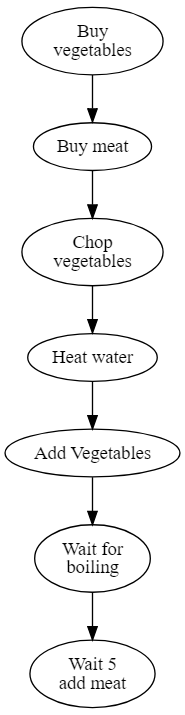

## Declarative Soup
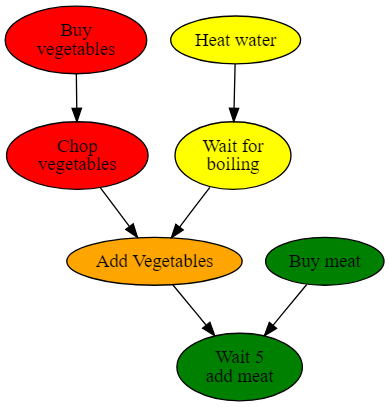

## Tensor Comprehensions
Facebook shows an example of why such representations are useful since they allow for the operations to be optimized later and massive performance improvements even for _fairly_ basic operations. 

![Comprehensions](https://research.fb.com/wp-content/uploads/2018/02/tc_evol_slower.gif)

In [17]:
import dask.array as da
from dask.dot import dot_graph
image_1 = da.zeros((5, 5), chunks=(5, 5))
image_2 = da.ones((5, 5), chunks=(5, 5))
image_1

dask.array<zeros, shape=(5, 5), dtype=float64, chunksize=(5, 5), chunktype=numpy.ndarray>

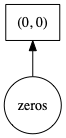

In [18]:
dot_graph(image_1.dask)

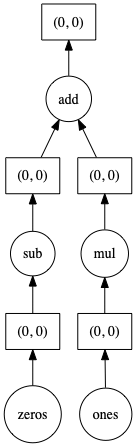

In [19]:
image_4 = (image_1-10) + (image_2*50)
dot_graph(image_4.dask)

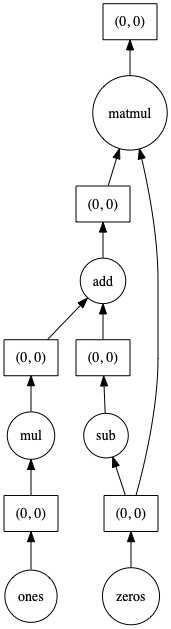

In [20]:
image_5 = da.matmul(image_1, image_4)
dot_graph(image_5.dask)

## Image Processing
the initial examples were shown on very simple image problems. Here we can see how it looks for real imaging issues.

(100, 200, 200)


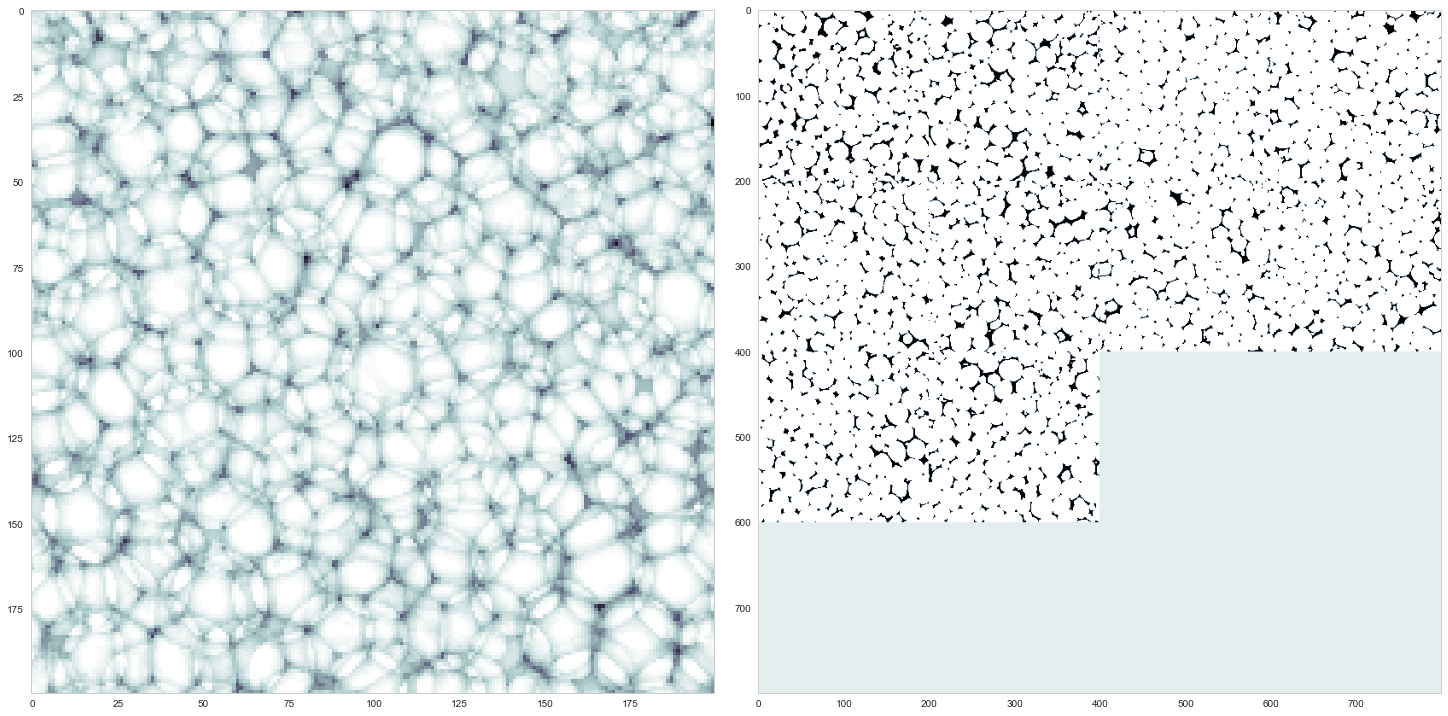

In [21]:
%matplotlib inline
import dask.array as da
from dask.dot import dot_graph
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.util import montage as montage2d
# for showing results
import dask.diagnostics as diag
foam_stack = imread('../common/data/plateau_border.tif')[:-54, 52:-52:2, 52:-52:2]
print(foam_stack.shape)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(np.sum(foam_stack, 0), cmap='bone_r')
ax2.imshow(montage2d(foam_stack[::10]), cmap='bone_r')

In [22]:
from itkwidgets import view
import itk
view(itk.GetImageFromArray(foam_stack))

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageUC3; pr…

In [23]:
da_foam = da.from_array(
    foam_stack/255.0, chunks=(20, 200, 200), name='FoamImage')
da_foam

dask.array<FoamImage, shape=(100, 200, 200), dtype=float64, chunksize=(20, 200, 200), chunktype=numpy.ndarray>

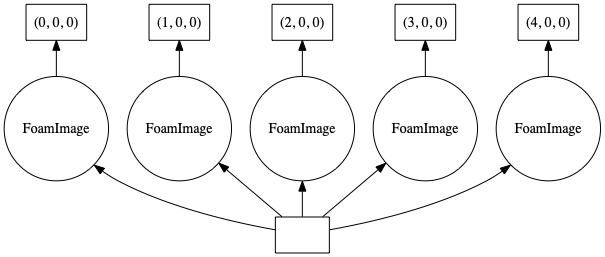

In [24]:
dot_graph(da_foam.dask)

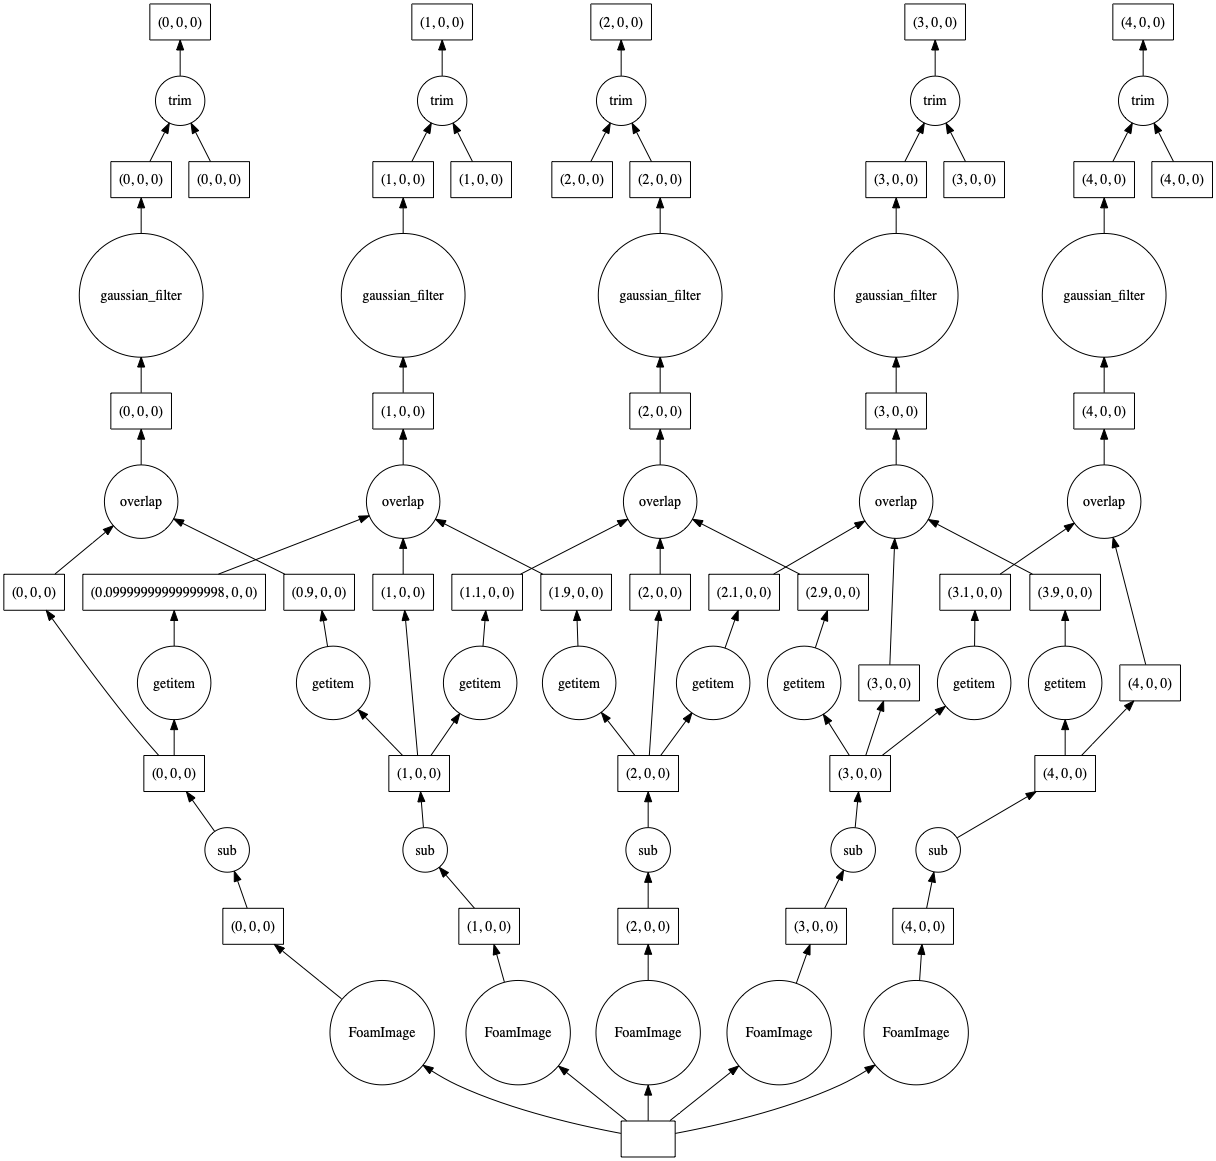

In [25]:
import dask_ndfilters as da_ndfilt
image_filt = da_ndfilt.gaussian_filter(1-da_foam, (3, 6, 6))
dot_graph(image_filt.dask)

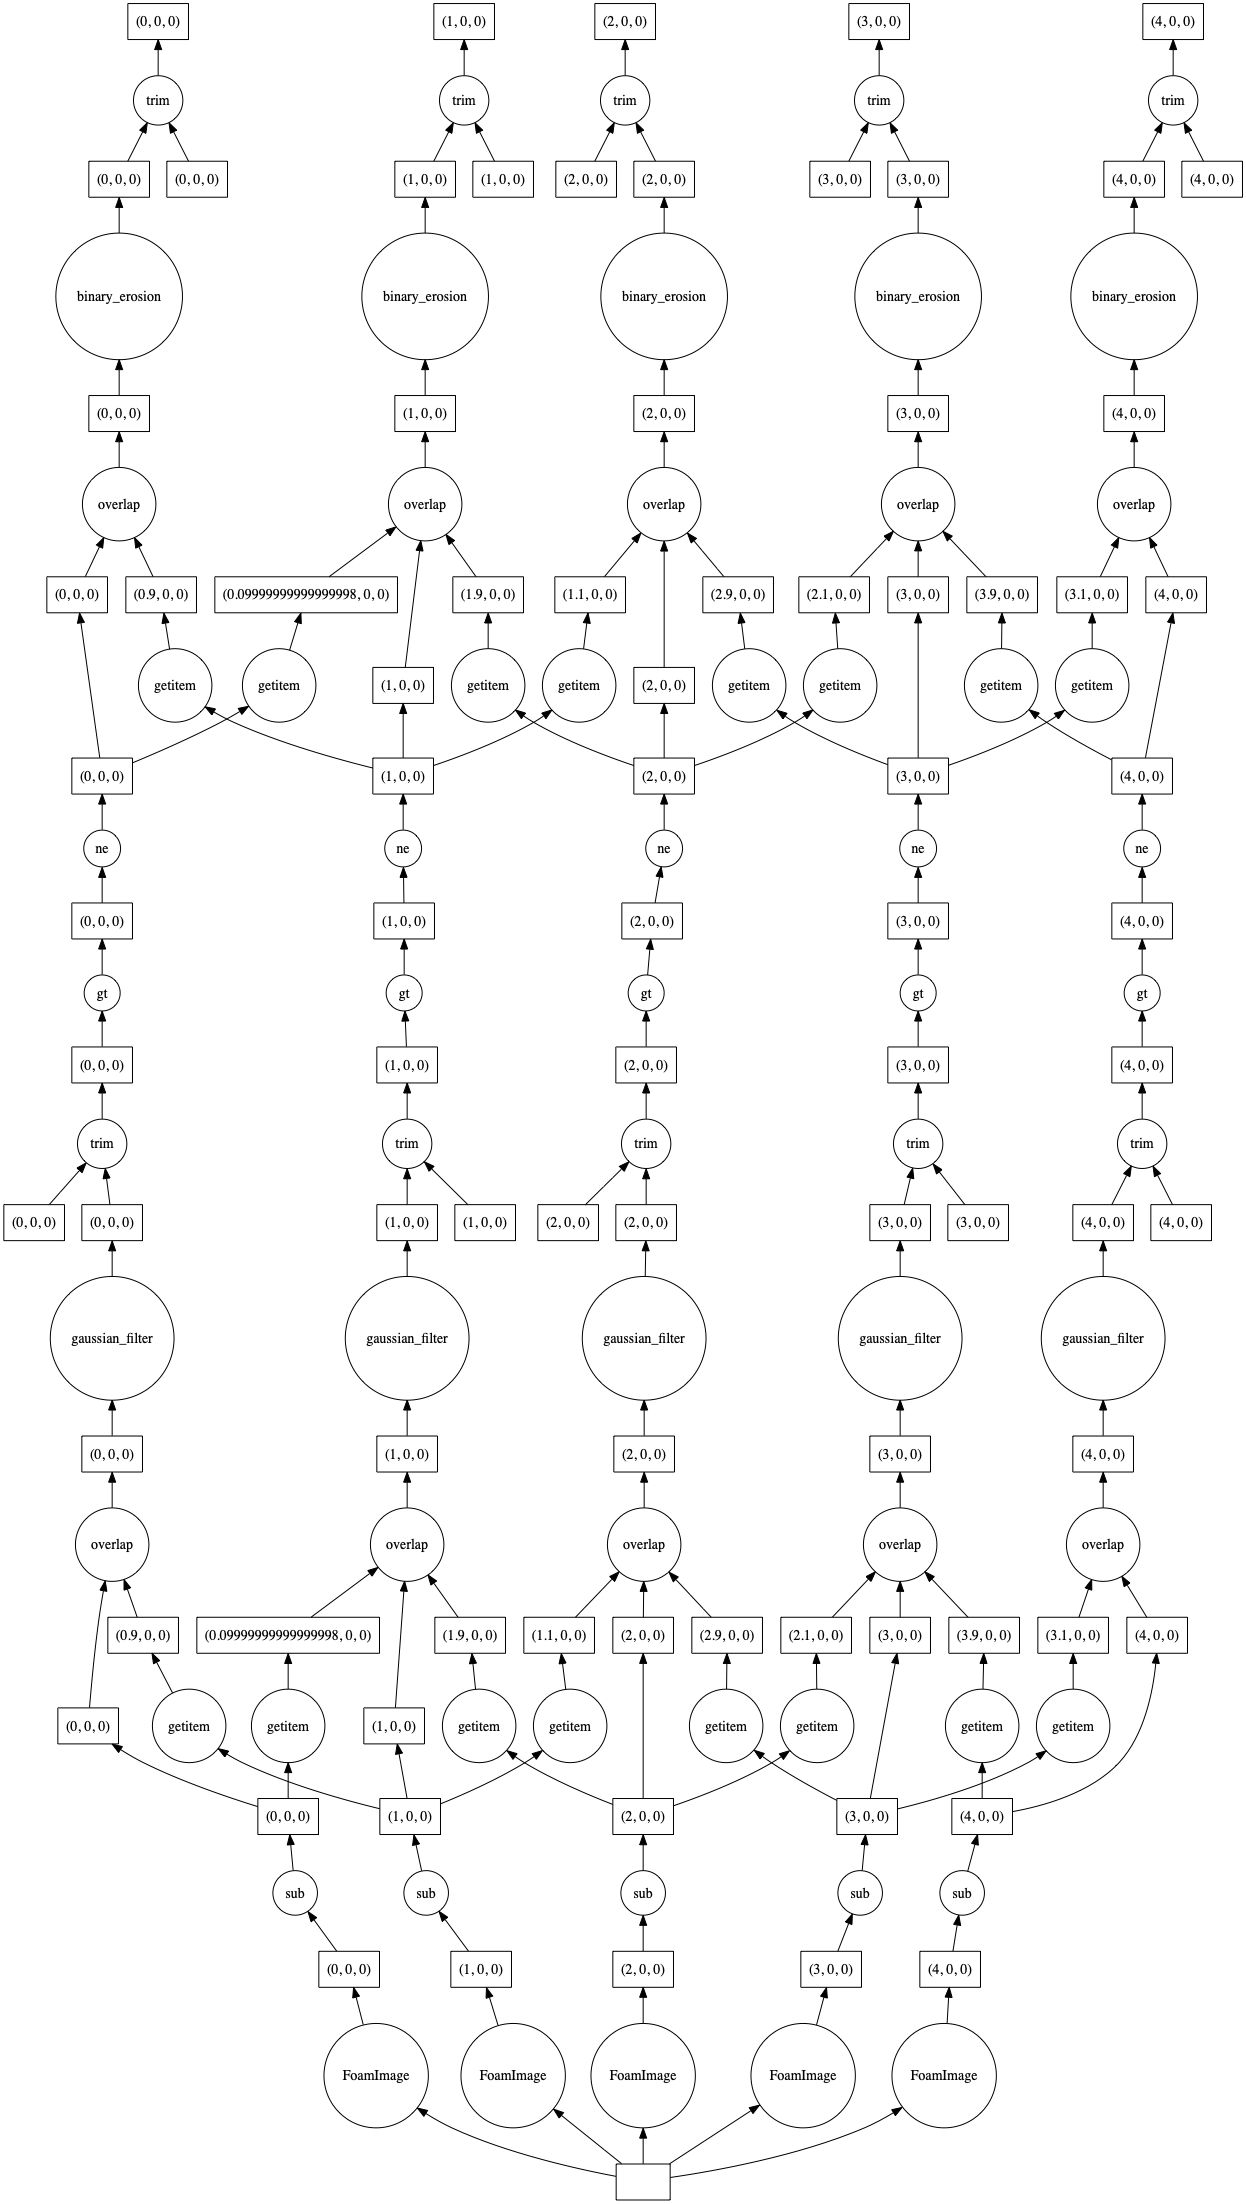

In [26]:
import dask_ndmorph as ndmorph
from skimage.morphology import ball
erode_foam = ndmorph.binary_erosion(image_filt > 0.9, ball(12))
dot_graph(erode_foam.dask)

In [27]:
from scipy.ndimage import label


def block_label(in_block, block_id=None):
    slice_no = block_id[0]
    offset = (np.prod(in_block.shape)*slice_no).astype(np.int64)
    label_img = label(in_block)[0].astype(np.int64)
    label_img[label_img > 0] += offset
    return label_img


lab_bubbles = erode_foam.map_blocks(block_label, dtype=np.int32)

In [28]:
with diag.ProgressBar(), diag.Profiler() as prof, diag.ResourceProfiler(0.5) as rprof:
    processed_stack = lab_bubbles.compute(num_workers=4)

[########################################] | 100% Completed |  9.4s


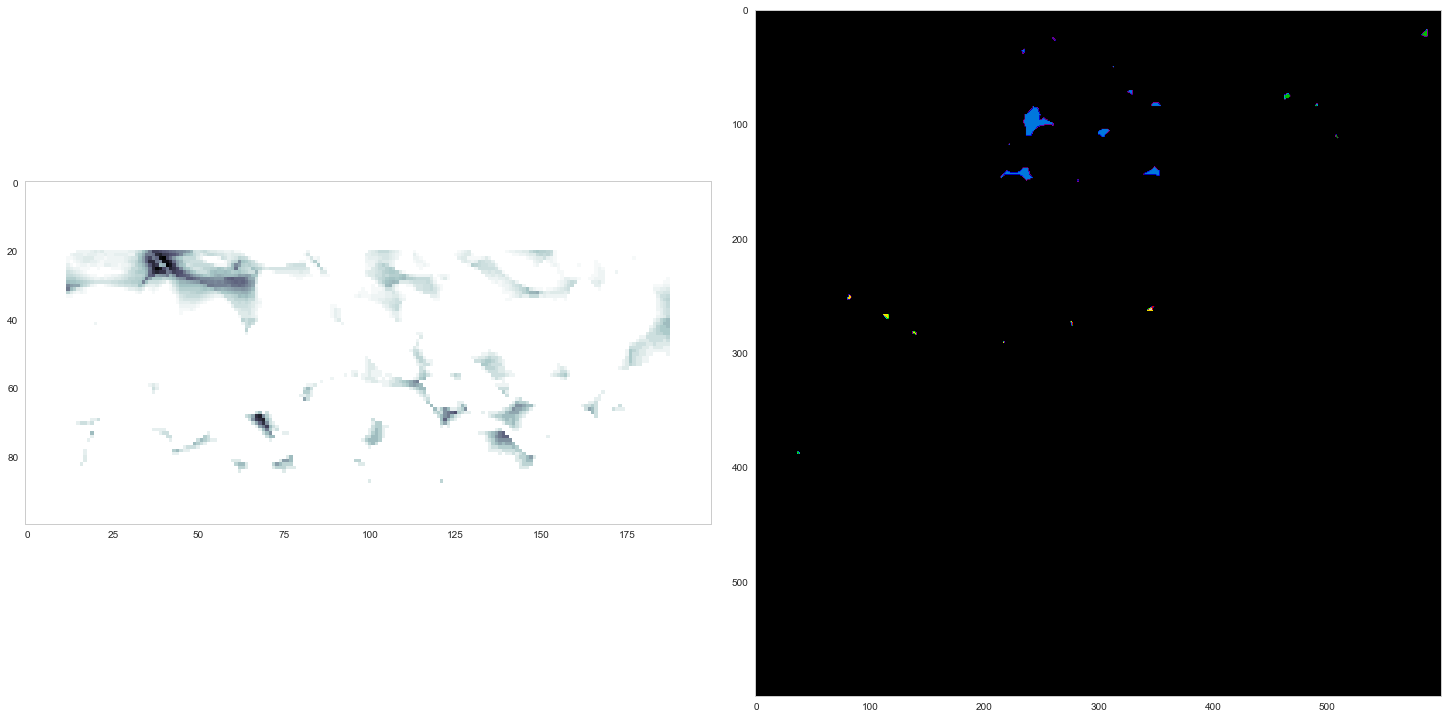

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(np.sum(processed_stack, 1), cmap='bone_r')
ax2.imshow(montage2d(processed_stack[::20]), cmap='nipy_spectral')

In [30]:
diag.visualize([prof, rprof])

Column(id='1360', ...)

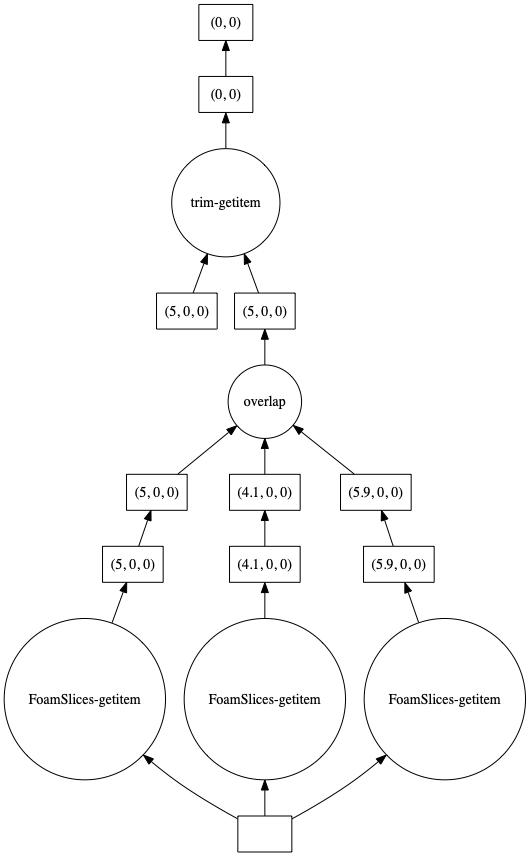

In [31]:
foam_slices_da = da.from_array(
    foam_stack/255.0, chunks=(10, 500, 500), name='FoamSlices')
filt_slices = da_ndfilt.gaussian_filter(foam_slices_da, (1.0, 9, 9))
single_slice = filt_slices[50]
single_slice.visualize(optimize_graph=True)

[########################################] | 100% Completed |  0.1s


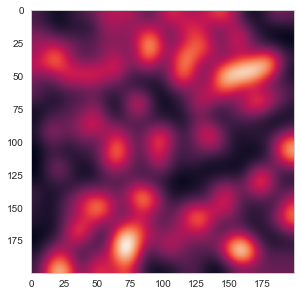

In [32]:
with diag.ProgressBar():
    plt.imshow(single_slice.compute(num_workers=4))

[########################################] | 100% Completed |  0.2s


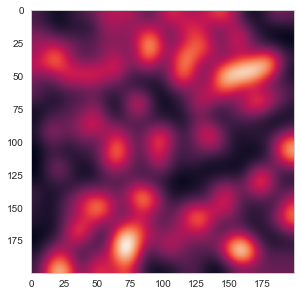

In [33]:
with diag.ProgressBar():
    plt.imshow(filt_slices.compute(num_workers=4)[50])

# Cloud Computing
- Computer, servers, workstations are wildly underused (majority are <50%)
- Buying a big computer that sits idle most of the time is a waste of money

<small>http://www-inst.eecs.berkeley.edu/~cs61c/sp14/
“The Case for Energy-Proportional Computing,” Luiz André Barroso, Urs Hölzle, IEEE Computer, December 2007</small>

![cloud services](../common/figures/cloud-services.png)




- Traditionally the most important performance criteria was time, how fast can it be done
- With Platform as a service servers can be rented instead of bought
- Speed is still important but using cloud computing $ / Sample is the real metric
- In Switzerland a PhD student if 400x as expensive per hour as an Amazon EC2 Machine
- Many competitors keep prices low and offer flexibility

-  Computers are very power inefficient if they are not utilized

![Cloud Computing](ext-figures/Efficiency.png)

### Cloud Resources

- Automatically setup
- Unlimited potential capacity and storage
- Cluster management already setup
- Common tools with many people using the same

## Cloud Computing Costs


The figure shows the range of cloud costs (determined by peak usage) compared to a local workstation with utilization shown as the average number of hours the computer is used each week.


## Equal Cost Point

Here the equal cost point is shown where the cloud and local workstations have the same cost. The x-axis is the percentage of resources used at peak-time and the y shows the expected usable lifetime of the computer. The color indicates the utilization percentage and the text on the squares shows this as the numbers of hours used in a week.

# Spark: Rich, heavily developed platform

### Available Tools
Tools built for table-like data data structures and much better adapted to it. 
 - [K-Means](https://github.com/apache/incubator-spark/blob/master/examples/src/main/scala/org/apache/spark/examples/SparkKMeans.scala), [Correlation](https://github.com/freeman-lab/thunder/blob/master/python/thunder/sigprocessing/localcorr.py), [PCA](https://github.com/freeman-lab/thunder/blob/master/python/thunder/factorization/pca.py)
 - [Matrix Factorization](https://amplab.cs.berkeley.edu/projects/dfc-%C2%A0divide-and-conquer-matrix-factorization/), [Genomics](https://amplab.cs.berkeley.edu/projects/dna-processing-pipeline/), [Graph Analytics](https://amplab.cs.berkeley.edu/projects/graphx/), [Machine Learning](https://amplab.cs.berkeley.edu/projects/mlbase/)

### Commercial Support

Dozens of major companies (Apple, Google, Facebook, Cisco, ...) donate over \$30M a year to development of Spark and the Berkeley Data Analytics Stack 
- 2 startups in the last 6 months with seed-funding in excess of $15M each

### Academic Support

- All source code is available on GitHub
 - Elegant (20,000 lines vs my PhD of 75,000+)
- No patents or restrictions on usage
- Machine Learning Course in D-INFK next semester based on Spark

# Beyond: Streaming


### Post-processing goals
- Analysis done in weeks instead of months
- Some real-time analysis and statistics

### Streaming
Can handle static data or live data coming in from a 'streaming' device like a camera to do real-time analysis.
The exact same code can be used for real-time analysis and static code

### Scalability

#### Connect more computers. 
#### Start workers on these computer.

# Beyond: Approximate Results


Projects at AMPLab like Spark and BlinkDB are moving towards approximate results.
- Instead of ```mean(volume)```
 - ```mean(volume).within_time(5)```
 - ```mean(volume).within_ci(0.95)```

For real-time image processing it might be the only feasible solution and could drastically reduce the amount of time spent on analysis.